# Introduction

Learning Curves in Machine Learning: A Diagnostic Tool

This tutorial shows how to use learning curves to diagnose bias/variance problems
and evaluate model performance as a function of training data size.

In [6]:

# 2: Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve, StratifiedKFold


In [7]:
# 3: Data generation
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

In [8]:
# 4: Learning curve computation
model = LogisticRegression(max_iter=1000)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

train_sizes, train_scores, val_scores = learning_curve(
    model, X, y,
    cv=cv,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy',
    n_jobs=-1
)

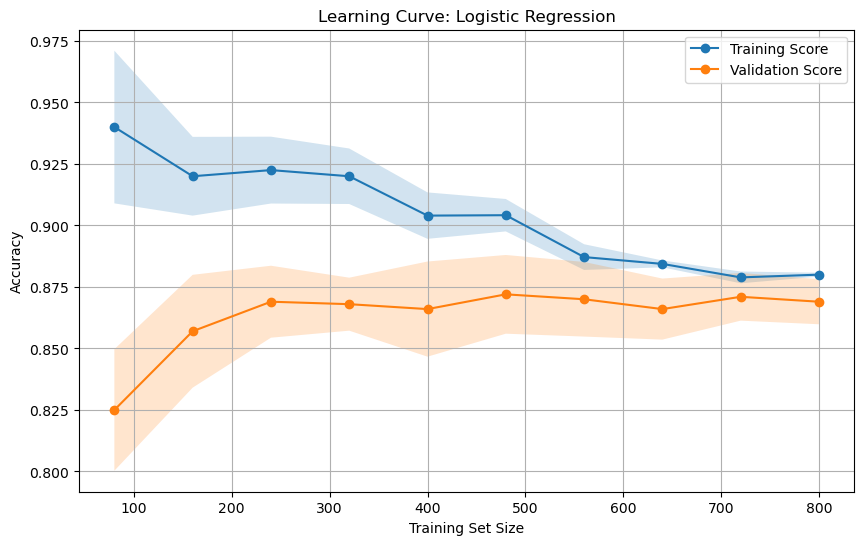

<Figure size 640x480 with 0 Axes>

In [9]:
# 5: Plotting
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Score", marker='o')
plt.plot(train_sizes, val_mean, label="Validation Score", marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2)
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve: Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()
# 6: Save the plot
plt.savefig("learning_curve_logistic_regression.png")


# Validation Curves

Here is an example of generating a validation curve using Scikit-learn. We use the `validation_curve` function to analyze how the performance of a model varies with respect to a hyperparameter, in this case, `C` in logistic regression.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import validation_curve

# Step 1: Create a synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Step 2: Define the model
model = LogisticRegression(max_iter=1000, solver='liblinear')

# Step 3: Define the range of hyperparameter values (C = inverse of regularization)
param_range = np.logspace(-4, 4, 10)

# Step 4: Compute validation curve
train_scores, val_scores = validation_curve(
    model, X, y,
    param_name="C",
    param_range=param_range,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

# Step 5: Compute means and standard deviations
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)


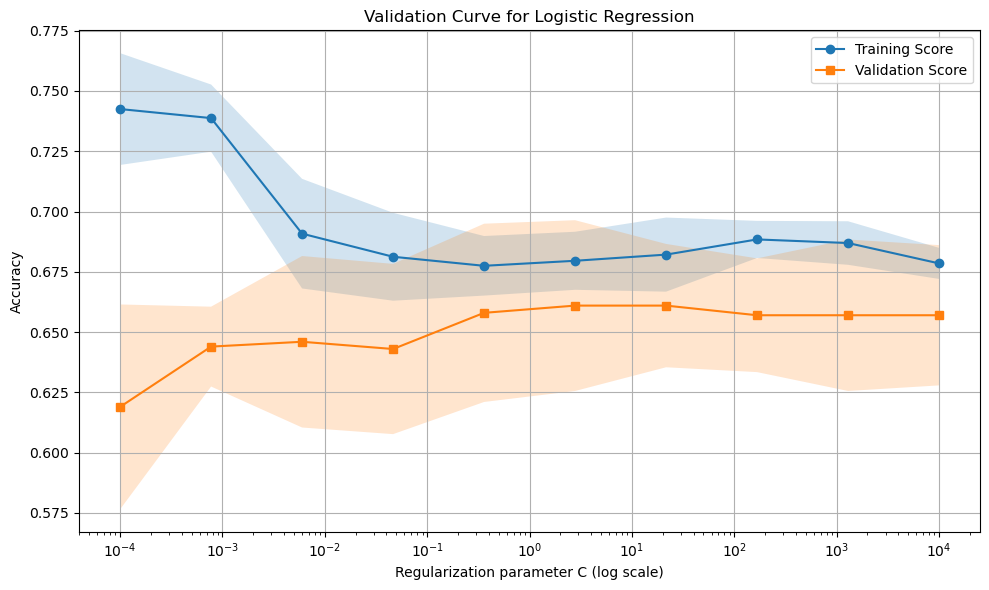

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 6))
plt.semilogx(param_range, train_mean, label="Training Score", marker='o')
plt.semilogx(param_range, val_mean, label="Validation Score", marker='s')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(param_range, val_mean - val_std, val_mean + val_std, alpha=0.2)
plt.title("Validation Curve for Logistic Regression")
plt.xlabel("Regularization parameter C (log scale)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
# Step 6: Save the plot
plt.savefig("validation_curve_logistic_regression.png")

## Inpterpretation

- Underfitting occurs at low values of C (strong regularization): both scores are low.

- Overfitting can appear at high C values (weak regularization): training score is high, validation score may drop.

- The optimal complexity is found at the C where validation score peaks.

The code below indicates where the model achieves optimal (estimated) generalization performance with a dashed line labeled "Best C".

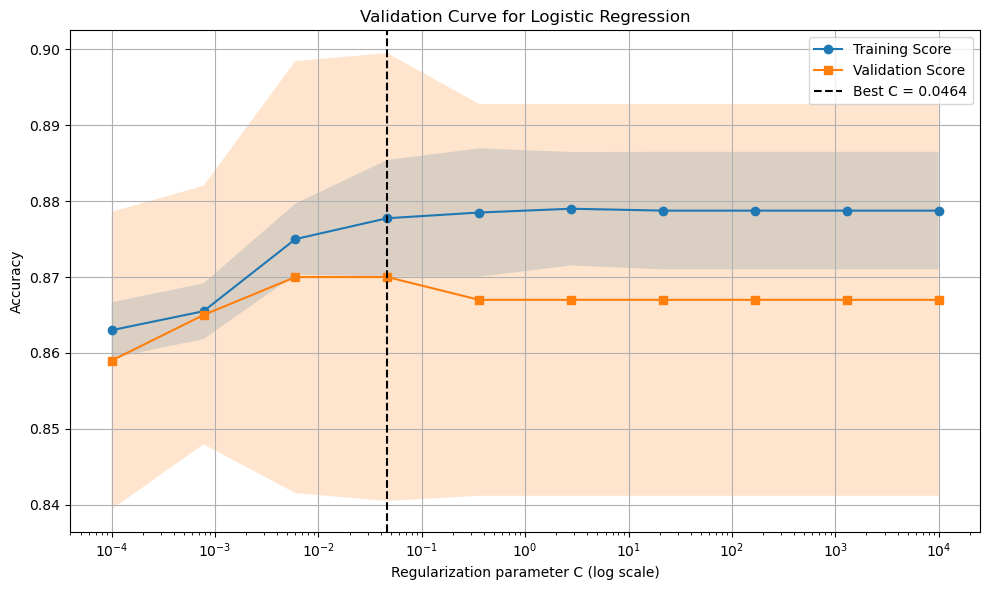

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# (Assuming previous variables like param_range, val_mean, etc. are already defined)

# Find the best C value (where validation accuracy is highest)
best_index = np.argmax(val_mean)
best_C = param_range[best_index]

plt.figure(figsize=(10, 6))
plt.semilogx(param_range, train_mean, label="Training Score", marker='o')
plt.semilogx(param_range, val_mean, label="Validation Score", marker='s')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(param_range, val_mean - val_std, val_mean + val_std, alpha=0.2)

# Add vertical line at best C
plt.axvline(x=best_C, color='black', linestyle='--', label=f'Best C = {best_C:.4f}')

plt.title("Validation Curve for Logistic Regression")
plt.xlabel("Regularization parameter C (log scale)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


#  Learning Curve with High Bias

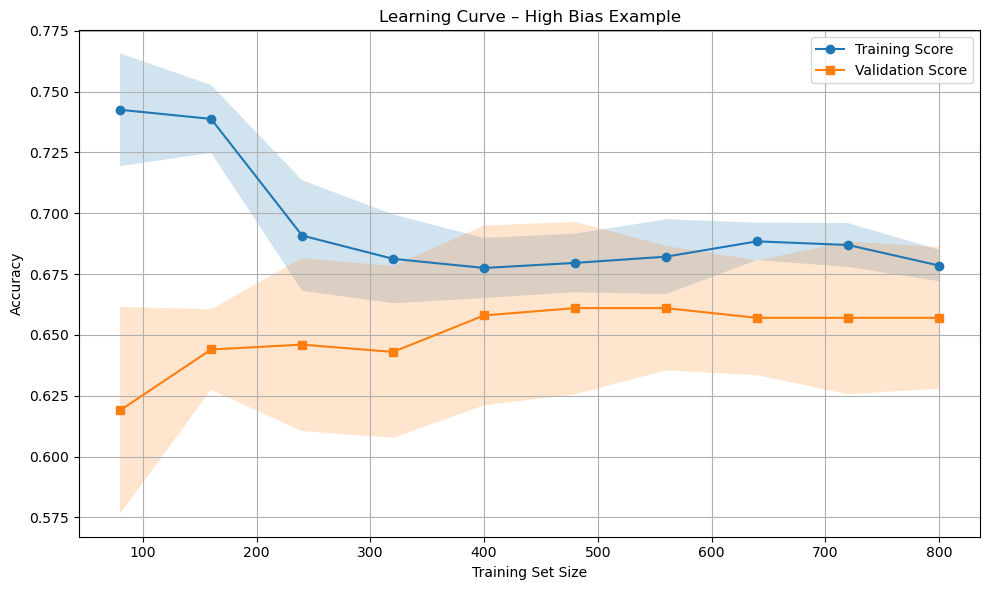

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve, StratifiedKFold

# Step 1: Create a dataset with complex patterns
X, y = make_classification(
    n_samples=1000, n_features=20, n_informative=15,
    n_redundant=5, n_classes=2, class_sep=0.5, random_state=42
)

# Step 2: Use a model too simple for the data (high bias)
model = LogisticRegression(max_iter=1000, penalty='l2', C=0.01, solver='liblinear')

# Step 3: Learning curve computation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
train_sizes, train_scores, val_scores = learning_curve(
    model, X, y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=cv,
    scoring='accuracy',
    n_jobs=-1
)

# Step 4: Compute mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Step 5: Plot
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Score", marker='o')
plt.plot(train_sizes, val_mean, label="Validation Score", marker='s')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2)

plt.title("Learning Curve – High Bias Example")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Step 6: Save the plot
plt.savefig("learning_curve_high_bias.png")
plt.close()


#  Learning Curve with High Variance

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve, StratifiedKFold

# Step 1: Create dataset (same as before)
X, y = make_classification(
    n_samples=1000, n_features=20, n_informative=15,
    n_redundant=5, n_classes=2, class_sep=0.5, random_state=42
)

# Step 2: Use a complex model prone to overfitting (high variance on small datasets)
model = RandomForestClassifier(max_depth=None, n_estimators=300, random_state=42)

# Step 3: Compute learning curve
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
train_sizes, train_scores, val_scores = learning_curve(
    model, X, y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=cv,
    scoring='accuracy',
    n_jobs=-1
)

# Step 4: Compute means and stds
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Step 5: Plot
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Score", marker='o')
plt.plot(train_sizes, val_mean, label="Validation Score", marker='s')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2)

plt.title("Learning Curve – High Variance Example")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.tight_layout()

# Step 6: Save to PNG
output_path = "./high_variance_learning_curve.png"
plt.savefig(output_path)
plt.close()

output_path


'./high_variance_learning_curve.png'

# Loss Curve

In [25]:
# pip install torch

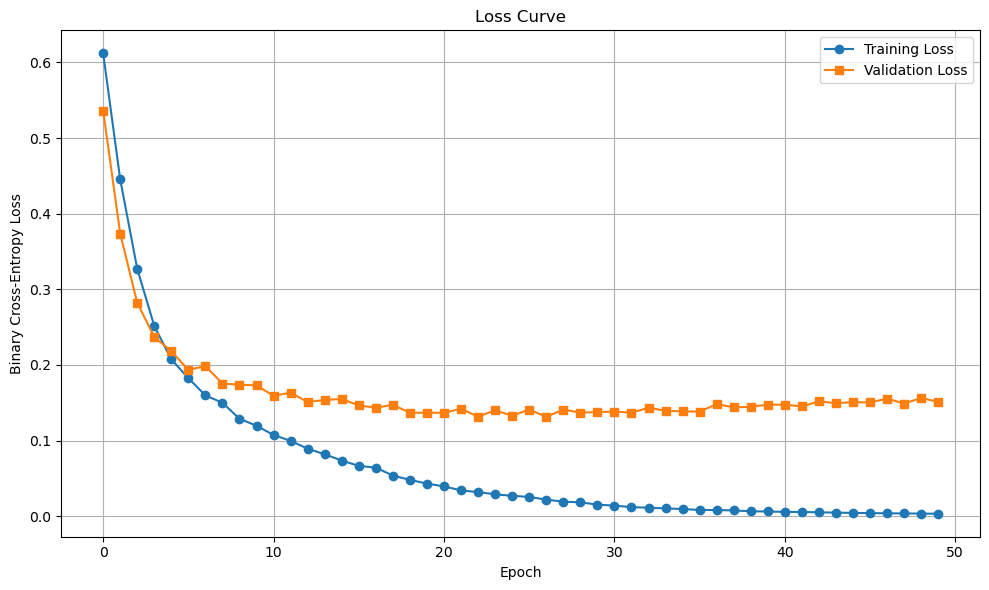

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

# Create binary classification data
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15,
                           n_redundant=5, random_state=42)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

# Train/test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=32, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val, y_val), batch_size=32)

# Define neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(20, 64), nn.ReLU(),
            nn.Linear(64, 64), nn.ReLU(),
            nn.Linear(64, 1), nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

model = SimpleNN()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
train_losses, val_losses = [], []

for epoch in range(50):
    model.train()
    running_loss = 0.0
    for xb, yb in train_loader:
        pred = model(xb)
        loss = criterion(pred, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * xb.size(0)
    train_losses.append(running_loss / len(train_loader.dataset))

    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for xb, yb in val_loader:
            pred = model(xb)
            loss = criterion(pred, yb)
            val_loss += loss.item() * xb.size(0)
    val_losses.append(val_loss / len(val_loader.dataset))

# Plot loss curves
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss', marker='o')
plt.plot(val_losses, label='Validation Loss', marker='s')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Binary Cross-Entropy Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("loss_curve_pytorch.png")
plt.show()

# Error Analysis Pipeline

Steps:

- Get model predictions on the validation set.

- Compute the confusion matrix.

- Calculate per-class metrics like precision, recall, and F1-score.

- Identify misclassified examples.

- Visualize errors.

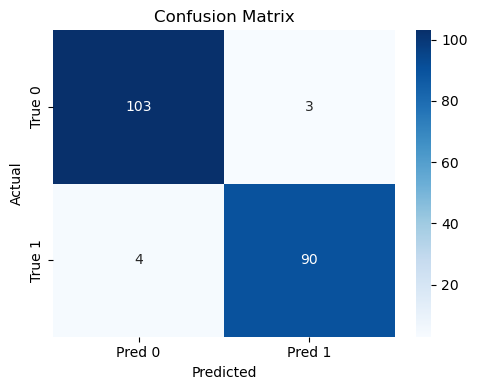

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.96      0.97      0.97       106
     Class 1       0.97      0.96      0.96        94

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.96       200
weighted avg       0.97      0.96      0.96       200

Number of misclassified examples: 7
First 5 misclassified predictions:
True label: 1, Predicted: 0
True label: 1, Predicted: 0
True label: 0, Predicted: 1
True label: 1, Predicted: 0
True label: 0, Predicted: 1


In [26]:
import torch
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assume: model, val_loader, and criterion are already defined from training phase

# Step 1: Collect predictions and true labels
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for xb, yb in val_loader:
        probs = model(xb)
        preds = (probs > 0.5).float()  # convert probabilities to binary class
        all_preds.extend(preds.squeeze().tolist())
        all_labels.extend(yb.squeeze().tolist())

# Convert to numpy arrays
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

# Step 2: Confusion matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Pred 0", "Pred 1"], yticklabels=["True 0", "True 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Step 3: Classification report
print("Classification Report:")
print(classification_report(all_labels, all_preds, target_names=["Class 0", "Class 1"]))

# Step 4: Identify misclassified examples
misclassified_indices = np.where(all_preds != all_labels)[0]
print(f"Number of misclassified examples: {len(misclassified_indices)}")

# Optional: Inspect the first few errors
print("First 5 misclassified predictions:")
for idx in misclassified_indices[:5]:
    print(f"True label: {int(all_labels[idx])}, Predicted: {int(all_preds[idx])}")


Interpretation:

- Confusion matrix helps identify if the model favors one class.

- Precision, recall, F1-score show class-specific performance.

- Misclassified samples can be manually inspected or plotted if associated with features like images or text.

The code below showa a PCA-based visualization of misclassified examples.

- Class 0 = blue

- Class 1 = green

- Misclassified points marked in red, using 2D PCA projection.

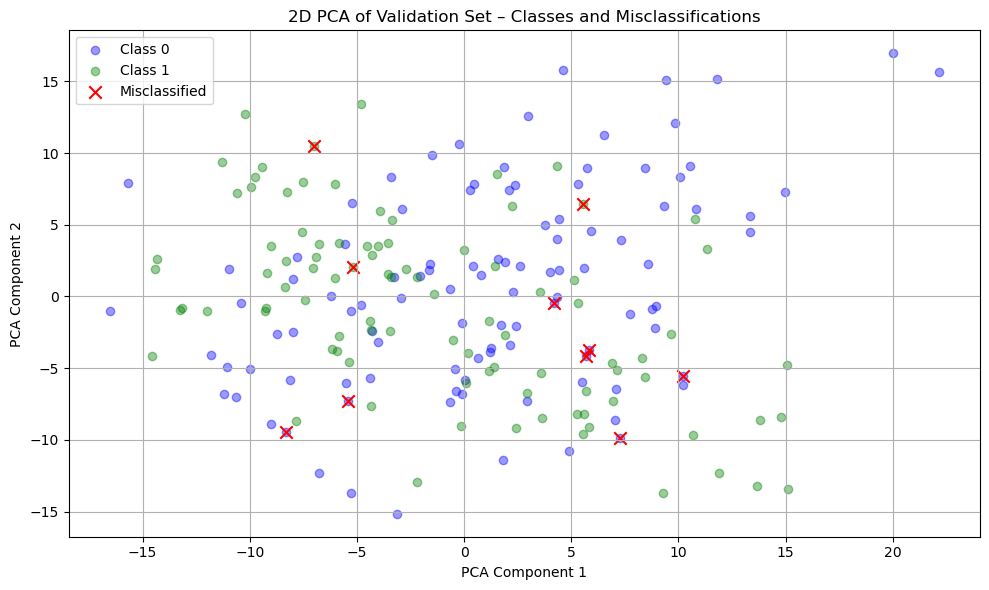

In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import numpy as np

# Create dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15,
                           n_redundant=5, random_state=42)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

# Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=32, shuffle=True)

# Define model
class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(20, 64), nn.ReLU(),
            nn.Linear(64, 64), nn.ReLU(),
            nn.Linear(64, 1), nn.Sigmoid()
        )
    def forward(self, x):
        return self.model(x)

model = SimpleNN()
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.BCELoss()

# Train briefly
for epoch in range(10):
    model.train()
    for xb, yb in train_loader:
        pred = model(xb)
        loss = criterion(pred, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

# Evaluate
model.eval()
with torch.no_grad():
    probs = model(X_val)
    preds = (probs > 0.5).float()

y_val_np = y_val.squeeze().numpy()
preds_np = preds.squeeze().numpy()
X_val_np = X_val.numpy()
misclassified = np.where(preds_np != y_val_np)[0]

# PCA projection
X_2d = PCA(n_components=2).fit_transform(X_val_np)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X_2d[y_val_np == 0, 0], X_2d[y_val_np == 0, 1], c='blue', alpha=0.4, label='Class 0')
plt.scatter(X_2d[y_val_np == 1, 0], X_2d[y_val_np == 1, 1], c='green', alpha=0.4, label='Class 1')
plt.scatter(X_2d[misclassified, 0], X_2d[misclassified, 1], c='red', marker='x', s=80, label='Misclassified')
plt.title("2D PCA of Validation Set – Classes and Misclassifications")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("misclassified_scatter_by_class.png")
plt.show()

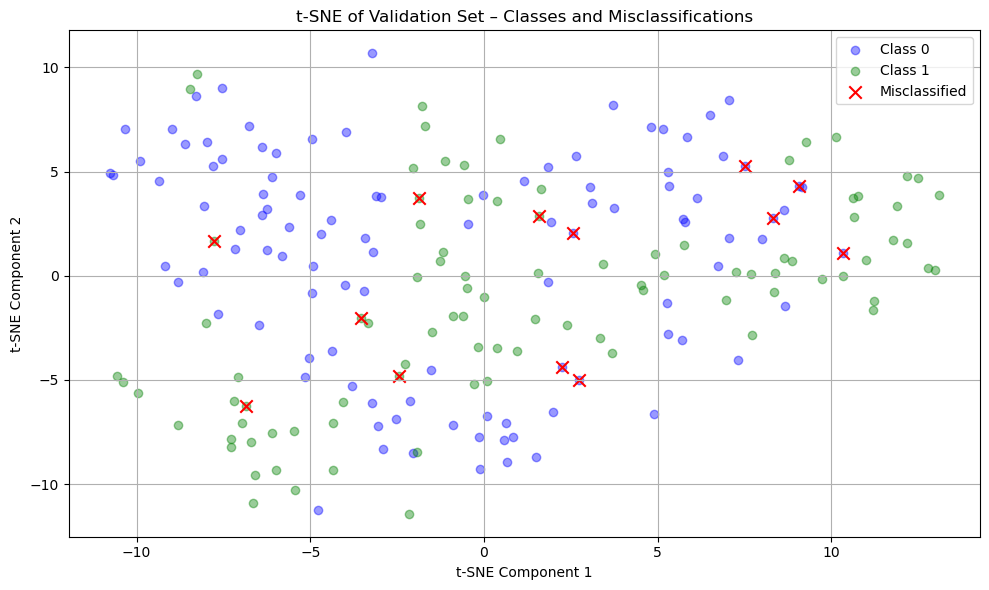

In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Create dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15,
                           n_redundant=5, random_state=42)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

# Step 2: Train/test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=32, shuffle=True)

# Step 3: Define model
class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(20, 64), nn.ReLU(),
            nn.Linear(64, 64), nn.ReLU(),
            nn.Linear(64, 1), nn.Sigmoid()
        )
    def forward(self, x):
        return self.model(x)

model = SimpleNN()
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.BCELoss()

# Step 4: Train briefly
for epoch in range(10):
    model.train()
    for xb, yb in train_loader:
        pred = model(xb)
        loss = criterion(pred, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

# Step 5: Evaluate on validation set
model.eval()
with torch.no_grad():
    probs = model(X_val)
    preds = (probs > 0.5).float()

# Step 6: Prepare data
X_val_np = X_val.numpy()
y_val_np = y_val.squeeze().numpy()
preds_np = preds.squeeze().numpy()
misclassified = np.where(preds_np != y_val_np)[0]

# Step 7: t-SNE projection (can take time)
X_2d = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000).fit_transform(X_val_np)

# Step 8: Plot
plt.figure(figsize=(10, 6))
plt.scatter(X_2d[y_val_np == 0, 0], X_2d[y_val_np == 0, 1], c='blue', alpha=0.4, label='Class 0')
plt.scatter(X_2d[y_val_np == 1, 0], X_2d[y_val_np == 1, 1], c='green', alpha=0.4, label='Class 1')
plt.scatter(X_2d[misclassified, 0], X_2d[misclassified, 1], c='red', marker='x', s=80, label='Misclassified')
plt.title("t-SNE of Validation Set – Classes and Misclassifications")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("misclassified_tsne.png")
plt.show()


# Flaging mislabeled examples

The code below illustrates how to flag likely mislabeled examples using disagreement between model and true label.

In [36]:
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset

# X_val, y_val: validation tensors
# model: trained PyTorch model
# threshold: probability confidence threshold to flag a suspicious label

def flag_mislabeled_examples(model, X_val, y_val, threshold=0.9):
    model.eval()
    with torch.no_grad():
        probs = model(X_val).squeeze().numpy()
        preds = (probs > 0.5).astype(int)
        labels = y_val.squeeze().numpy()

    # Step 1: Disagreement
    disagreement = preds != labels

    # Step 2: High-confidence predictions (wrong with high certainty)
    high_confidence_wrong = ((probs >= threshold) & (preds == 1) & disagreement) | \
                            ((probs <= 1 - threshold) & (preds == 0) & disagreement)

    # Step 3: Indices of suspicious examples
    flagged_indices = np.where(high_confidence_wrong)[0]

    print(f"⚠️  Flagged {len(flagged_indices)} potentially mislabeled examples.")
    return flagged_indices, probs, preds


In [37]:
flagged, probs, preds = flag_mislabeled_examples(model, X_val, y_val)

for idx in flagged[:5]:  # Inspect first 5
    print(f"Index: {idx} | True label: {int(y_val[idx])} | Predicted: {preds[idx]} | Confidence: {probs[idx]:.4f}")


⚠️  Flagged 2 potentially mislabeled examples.
Index: 11 | True label: 1 | Predicted: 0 | Confidence: 0.0845
Index: 144 | True label: 0 | Predicted: 1 | Confidence: 0.9826
